# What are Brain Tumors?
A brain tumor is a mass or growth of abnormal cells in your brain.

Many different types of brain tumors exist. Some brain tumors are noncancerous (benign), and some brain tumors are cancerous (malignant). Brain tumors can begin in your brain (primary brain tumors), or cancer can begin in other parts of your body and spread to your brain as secondary (metastatic) brain tumors.

<div>
<img src="https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2014/10/30/15/17/mcdc7_brain_cancer-8col.jpg" alt="brain_tumor_image" style="width: 300px;"/>
</div>

## In this Notebook we speak about 4 types of Brain Tumors

### 1. Glioma

Glioma is a type of tumor that occurs in the brain and spinal cord. Gliomas begin in the gluey supportive cells (glial cells) that surround nerve cells and help them function. Three types of glial cells can produce tumors. A glioma can affect your brain function and be life-threatening depending on its location and rate of growth.
Gliomas are one of the most common types of primary brain tumors.

<div>
    <img src="https://assets.cureus.com/uploads/figure/file/164887/lightbox_0a114f70280b11eb8f411b16d840121c-final-2.png" style="width:600px;"/>
</div>

### 2. Meningioma

A meningioma is a tumor that arises from the meninges — the membranes that surround the brain and spinal cord. Although not technically a brain tumor, it is included in this category because it may compress or squeeze the adjacent brain, nerves and vessels. Meningioma is the most common type of tumor that forms in the head.
Most meningiomas grow very slowly, often over many years without causing symptoms. But sometimes, their effects on nearby brain tissue, nerves or vessels may cause serious disability.

<div>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjOeFTen8qxZfMRwXKXQlwUN0TWkMPMvzfig&usqp=CAU" style="width:700px;">
</div>

### 3. Pituitary Tumors (Adenoma)

Pituitary tumors are abnormal growths that develop in your pituitary gland. Some pituitary tumors result in too much of the hormones that regulate important functions of your body. Some pituitary tumors can cause your pituitary gland to produce lower levels of hormones. Most pituitary tumors are noncancerous (benign) growths (adenomas). Adenomas remain in your pituitary gland or surrounding tissues and don't spread to other parts of your body.

<div>
    <img src="https://assets.cureus.com/uploads/figure/file/71851/lightbox_0e62470096cb11e989a2d7e4904c7be4-Figure-2a.png" style="width:500px;"/>
</div>

## Importing the Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# libraries need to prepare the data
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# libraries required to build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# libraries for activation functions required
from tensorflow.keras.activations import relu
from tensorflow.keras.activations import softmax

# weight initializer libraries
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.initializers import HeUniform

# optimizer library
from tensorflow.keras.optimizers import Adam

# callback library
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
# setting the random seed to generalize the output
# the seed value is used to generate the random number generator. 
# And, every time you use the same seed value, you will get the same random values.

# setting random seed in numpy
from numpy.random import seed
seed(1)

# setting random seed in tensorflow
tf.random.set_seed(2)

## Preparing the Dataset

### Preparing Training Images

In [3]:
# creating an object of the ImageDataGenerator class
# the ImageDatagenerator class helps in image augmentation by allowing us to apply different transforms to our images
# for example: rescale - normaizes the value of each colour channel(R or G or B) of each pixel between 0 and 1
#              shear range - shears images by a certain amount ( value accepted is between 0 and 1)
#              rotation range - rotates images by a certain amount
#              zoom range - allows us to zoom images
#              horizontal and vertical flip - flips images by in directions named to produce input randomness
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    rotation_range=2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True)

In [5]:
# we now use the flow_from_directory function from the ImageDataGenerator class
# this function allows us to import our dataset consisting of images from a directory/folder
# target_size - resizes the images according to the input shape of the model
# class mode - using categorical class mode since we have a multiclass classification
# batch_size - gives batches of images as input to the model instead of single images
training_set = train_data_gen.flow_from_directory(directory="../input/brain-tumor-mri-dataset/Training",
                                                  target_size=(224,224),
                                                  class_mode='categorical',
                                                  batch_size=32)

Found 5712 images belonging to 4 classes.


### Preparing Validation Images

In [6]:
# creating another object of ImageDataGenerator class
# here we do not apply any transformations because we want our validation data to be absolutely new to our model ( i.e. unprepared) 
# we only rescale the pixel values to normalize them between 0 and 1
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [7]:
# importing our validation set images with the same image size and batch size
validation_set = validation_data_gen.flow_from_directory(directory="../input/brain-tumor-mri-dataset/Testing",
                                                        target_size=(224,224),
                                                        class_mode='categorical',
                                                        batch_size=32)

Found 1311 images belonging to 4 classes.


### How the dataset looks ?

In [8]:
# next function iterates over the training set and separates the images and their labels 
imgs, labels = next(training_set)

In [9]:
#we define a function that prints the first 10 images from the training set 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

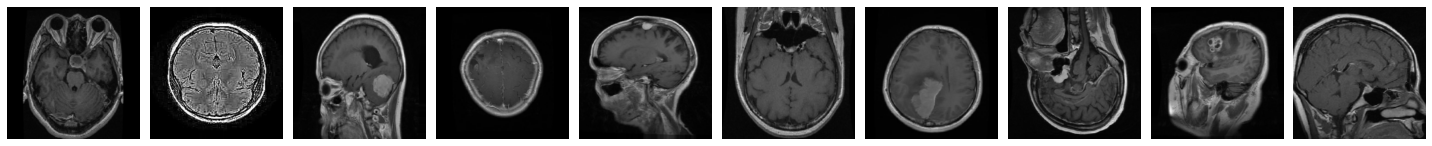

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [10]:
# calling our function to print the first 10 images
plotImages(imgs)
# printing all the labels from the first batch of 32 images
print(labels)

## Building a Convolutional Neural Network

In [11]:
# the Sequential() helps make a sequential model. 
# A sequential model is a model which consists of a sequence of layers.
model = Sequential()

2022-12-12 13:30:57.214711: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 13:30:57.215661: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 13:30:57.533563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 13:30:57.534487: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 13:30:57.535264: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

### Adding First Cluster of 2 Convolution and 1 Max Pooling Layer

In [12]:
# adding a Conv2D layer
# Conv2D is a function for the convolutional layer 
# In a convolutional layer, multiple filters are applied on each image to highlight key features from the particular image
# after the applying the filters the image is called a feature map
# here we apply 32 filters to each image and our filters are 3x3 matrices which is the kernel_size
# we give our activation function as ReLU. This is one the best activation functions because it helps prevent Vanishing Gradient Problem during the backpropagation stage
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 activation=relu,
                 input_shape=[224, 224, 3]))

In [13]:
# Adding a secong convolutional layer
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 activation=relu))

In [14]:
# Adding the first MaxPool2D layer
# MaxPool2D is a function for the max pooling layer
# In the max pooling layer we apply a kernel to the feature maps which preserves only the highlighted portions on the images
# there are other types of pooling like minPooling, avgPooling, etc.
# here we use pool_size 2 which decides the size of the matrix(area) from which we select the highest value(max pooling)
# strides - this is the number of places the kernel will move after taking max from one area ( the kernel moves from left to right)
# padding - while moving if our kernel faces empty places within it when at one edge of the feature map, then it uses padding by applying zero values to those places
model.add(MaxPool2D(pool_size=2,
                    strides=2,
                    padding='valid'))

### Adding 2nd Cluster of 2 Convolution & 1 Max Pooling Layer

In [15]:
# adding another Conv2D layer
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 activation=relu))

In [16]:
# adding a fourth Conv2D layer
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 activation=relu))

In [17]:
# adding a second MaxPool2D layer 
model.add(MaxPool2D(pool_size=2,
                    strides=2,
                    padding='valid'))

### Flattening the Output of Convolutional Layers

In [18]:
# adding a Flatten layer
# the Flatten() layer is used to flatten the output from the last layer to prepare it for input to the upcoming fully connected layers
model.add(Flatten())

### Adding 2 Fully Connected Layers with Dropout Layer in Between

In [19]:
# adding the first Dense layer
# this is our first fully connected layer which allows the model to train itself by adjusting the weights and biases
# neurons - this is the number of neurons that are present in this layer. Here we use 32 neurons (experimental value)
# activation - we use ReLU 
# use_bias - we set this to true as we want to use a bias value 
# kernel_initializer - this is used to initialize the weights at the beginning of the training
#                      There are many types of weight initializers like Xavier/Gorat (Uniform & Normal) or He (Uniform & Normal), etc.
model.add(Dense(units=32,
                activation=relu,
                use_bias=True
#                 kernel_initializer=HeNormal()
               ))

In [20]:
# Here we are using a Dropout layer
# A dropout layer disables some randomly chosen neurons by making their input weights zero during training.
# During testing, these connections are reconnected.
# we use a dropout layer to prevent overfitting because sometimes the model gets too dependent on some particular neurons
# and thus gets overfitted.
model.add(Dropout(0.4))

In [21]:
# adding another fully connected layer
model.add(Dense(units=16,
                activation=relu,
                use_bias=True
#                 kernel_initializer=HeUniform()
               ))

### Adding Output Layer

In [22]:
# This is our output layer. 
# We use 4 neurons in our layer since ours is a multiclass classification and we have 4 categories to classify between.
model.add(Dense(units=4,
                activation=softmax))

### Printing Details of Model

In [23]:
# printing the details of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 179776)            0

### Compiling the Model

In [24]:
# This is the compilation stage. 
# We use the compile()
# optimizer - here we give an optimizer function which is currently one of the best optimizers as it uses both a momentum (weighted average) for noise reduction and 
#             also uses an adaptive learning rate
# loss - we use the categorical_crossentropy to calculate our loss as we have multiclass classification
# metrics - we use accuracy as a measure of performance of our model
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

## Training out Model

In [25]:
# we train the model using the fit()
# x - the training data
# vaidation_data - data against which the model accuracy will be calculated after training
# epochs - number of times the model will train on the whole dataset to improve its performance. Here the value 60 is completely experimental.
# verbose - determines verbosity. types of messages to display.

model_history = model.fit(x=training_set,validation_data=validation_set,epochs=60,verbose=1)

2022-12-12 13:34:44.921437: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60


2022-12-12 13:34:47.875493: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


179/179 [==============================] - 139s 701ms/step - loss: 1.1109 - accuracy: 0.5037 - val_loss: 0.8814 - val_accuracy: 0.7101
Epoch 2/60
179/179 [==============================] - 89s 495ms/step - loss: 0.8910 - accuracy: 0.6045 - val_loss: 0.7189 - val_accuracy: 0.7323
Epoch 3/60
179/179 [==============================] - 87s 486ms/step - loss: 0.8275 - accuracy: 0.6287 - val_loss: 0.6793 - val_accuracy: 0.7117
Epoch 4/60
179/179 [==============================] - 87s 484ms/step - loss: 0.7714 - accuracy: 0.6635 - val_loss: 0.8105 - val_accuracy: 0.6834
Epoch 5/60
179/179 [==============================] - 87s 488ms/step - loss: 0.7503 - accuracy: 0.6724 - val_loss: 0.6603 - val_accuracy: 0.7254
Epoch 6/60
179/179 [==============================] - 87s 484ms/step - loss: 0.6965 - accuracy: 0.6931 - val_loss: 0.6287 - val_accuracy: 0.7376
Epoch 7/60
179/179 [==============================] - 87s 488ms/step - loss: 0.6839 - accuracy: 0.7017 - val_loss: 0.5927 - val_accuracy: 0.

## Plotting Accuracy of the Model

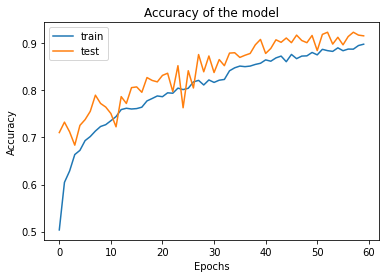

In [37]:
# comparing the training and testing accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

## Plotting Loss of the Model

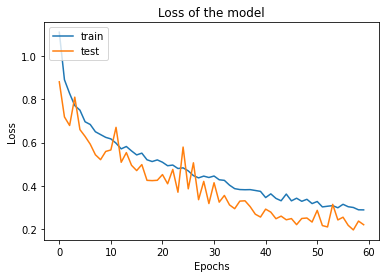

In [38]:
# comparing training and testing loss 
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

## Indexing our Output Values

In [39]:
index = ['glioma','meningioma','normal','adenoma']

## Prediction 1 (Meningioma)

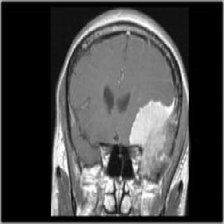

In [46]:
test_image1 =  load_img('../input/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0000.jpg',target_size = (224,224))
test_image1

In [47]:
test_image1 = img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1,axis=0)
result1 = np.argmax(model.predict(test_image1/255.0),axis=1)
print(index[result1[0]])

meningioma


## Prediction 2 (Adenoma)

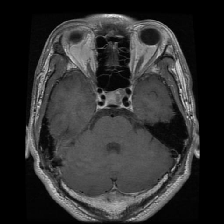

In [48]:
test_image2 = load_img('../input/brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0000.jpg',target_size = (224,224))
test_image2

In [49]:
test_image2 = img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2,axis=0)
result2 = np.argmax(model.predict(test_image2/255.0),axis=1)
print(index[result2[0]])

adenoma
